In [1]:
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from src.nb_utils import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

## Baseline confirmation

In [4]:
experiment_path = "../results/2019Nov26-201531_a2c_confirm/"
hyperparams = ["nsteps", "gamma", "lr", "beta_entropy", "env_name"]
metrics = ["R/ep"]

trial_paths = get_file_paths(experiment_path)
data = get_data(trial_paths, hyperparams, metrics, log="valid", cb=custom_experiment_name)

Processing 70 trials.


In [5]:
data["experiment"].unique()

array(['a2c_ab_7d018958', 'a2c_ab_af32a06a', 'a2c_ab_7c1a7aae',
       'a2c_llc_b5cf56c4', 'a2c_llc_9e7953d8', 'a2c_llc_6912ec4c',
       'a2c_llc_6ead0806'], dtype=object)

### LunarLanderContinous-v2

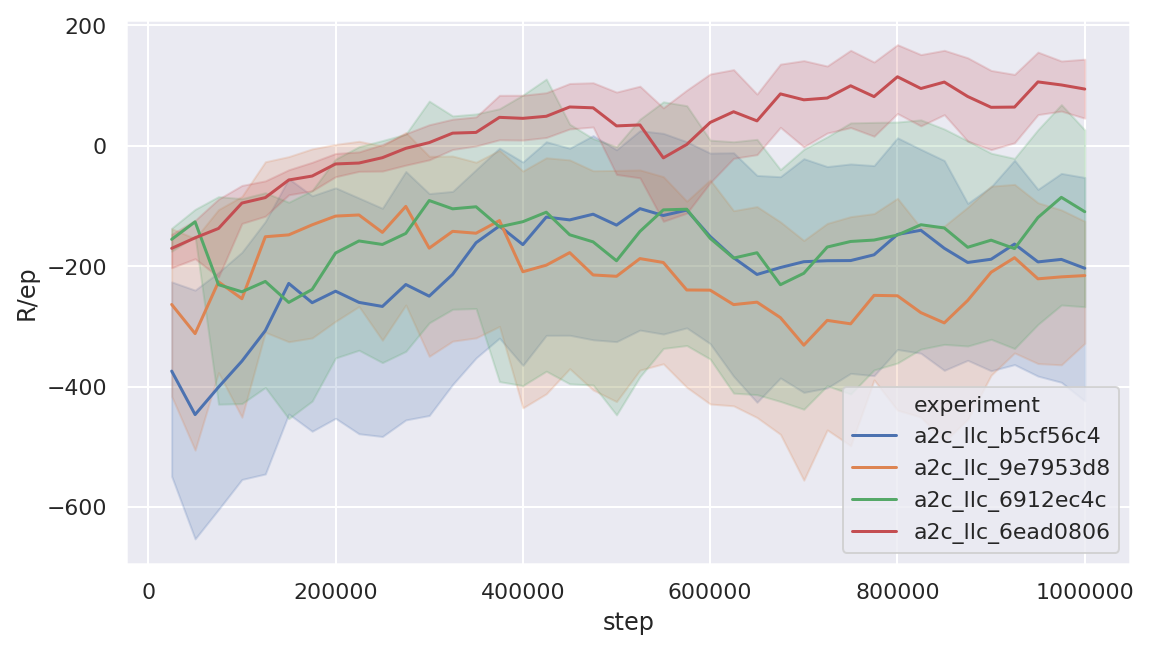

In [6]:
df_llc = data.loc[data["experiment"].str.contains('a2c_llc')].copy()
plot(df_llc, x="step", hue="experiment", window=0)

### Acrobot-v1

Done rolling average of R/ep, grouped by:  ['nsteps', 'gamma', 'lr', 'beta_entropy', 'env_name', 'trial', 'experiment']


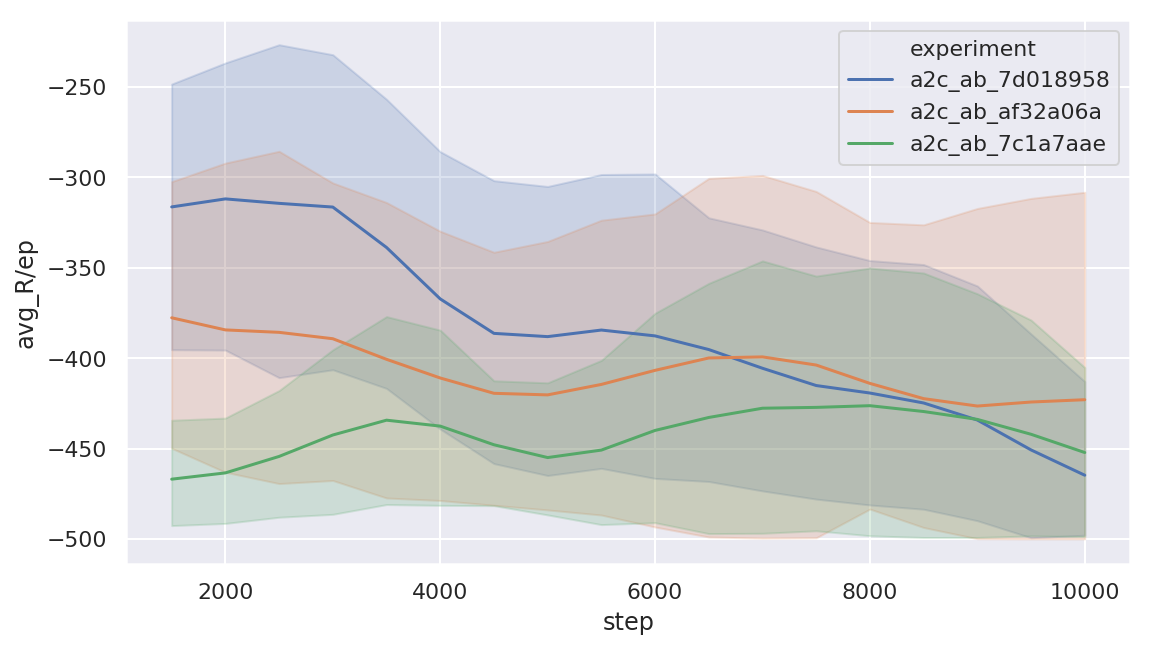

In [7]:
df_ab = data.loc[data["experiment"].str.contains('a2c_ab')].copy()
plot(df_ab, x="step", hue="experiment", window=3)

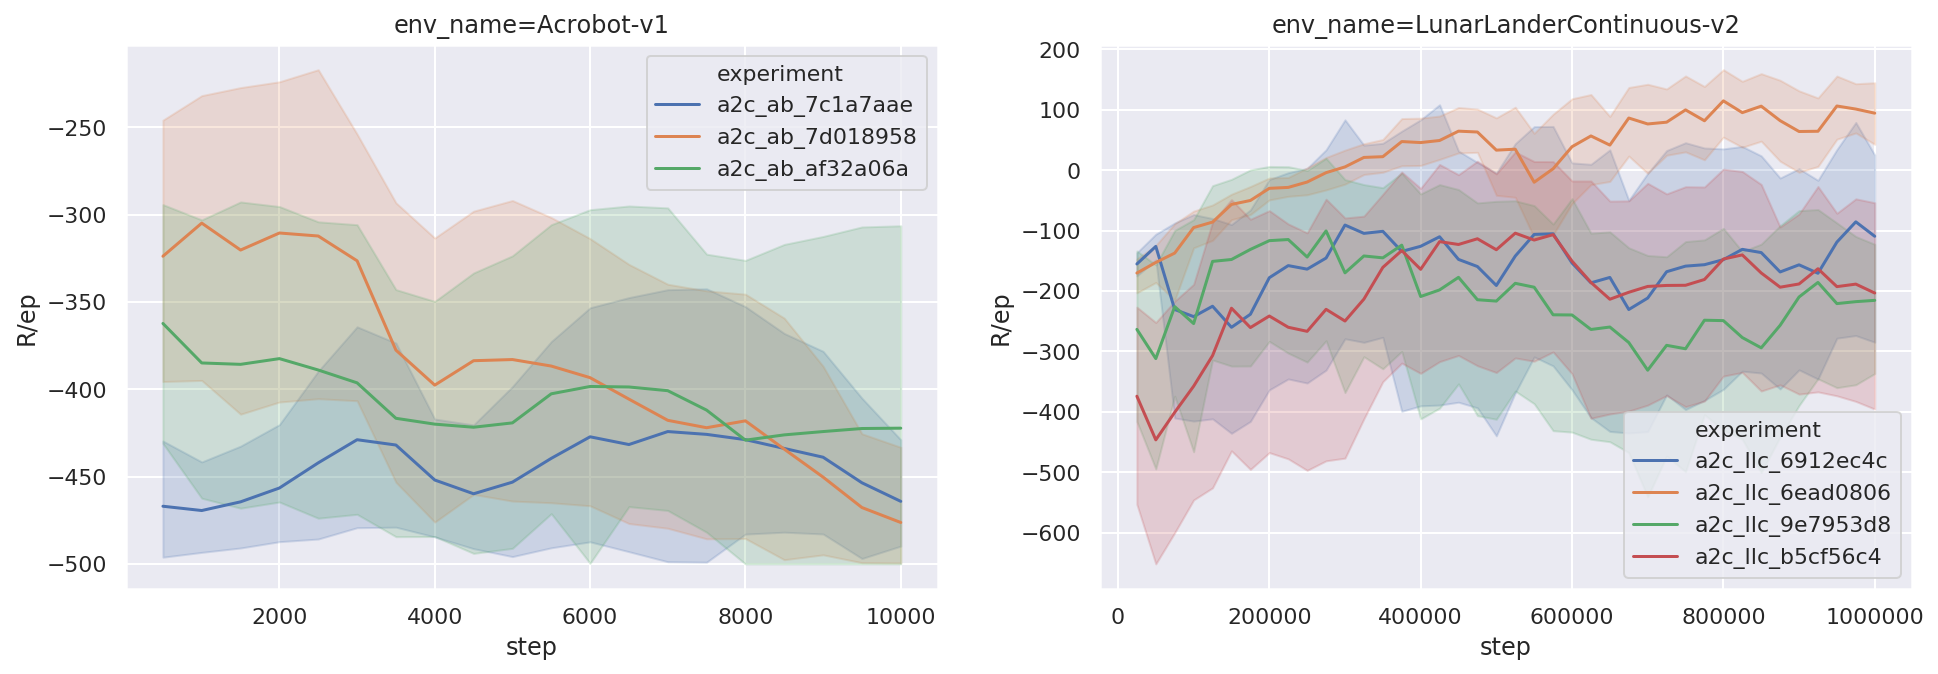

In [8]:
plot_grid(data.copy(), x="step", hue="experiment", cols="env_name", window=0)

## neAC confirmation

In [9]:
experiment_path = "../results/2019Nov27-073328_neac_confirm/"
hyperparams = ["nsteps", "gamma", "lr", "beta_entropy", "dnd.lr", "dnd.size", "dnd.key_size", "env_name"]
metrics = ["R/ep"]

trial_paths = get_file_paths(experiment_path)
data = get_data(trial_paths, hyperparams, metrics, log="valid", cb=custom_experiment_name)

Processing 40 trials.


In [10]:
data.experiment.unique()

array(['neac_llc_97306f06', 'neac_ab_aa315a12', 'neac_ab_1a3ed1d8',
       'neac_llc_4dc127e8'], dtype=object)

### LunarLanderContinuous

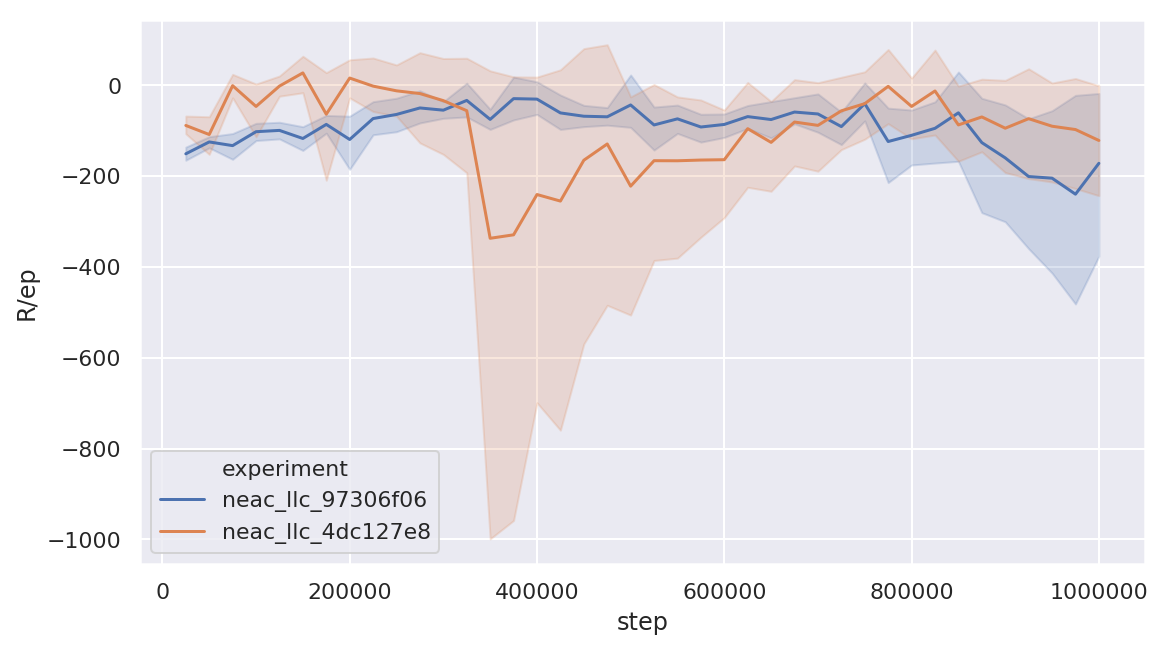

In [11]:
df_llc = data.loc[data["experiment"].str.contains('neac_llc')].copy()
plot(df_llc, x="step", hue="experiment", window=0)

### Acrobot-v1

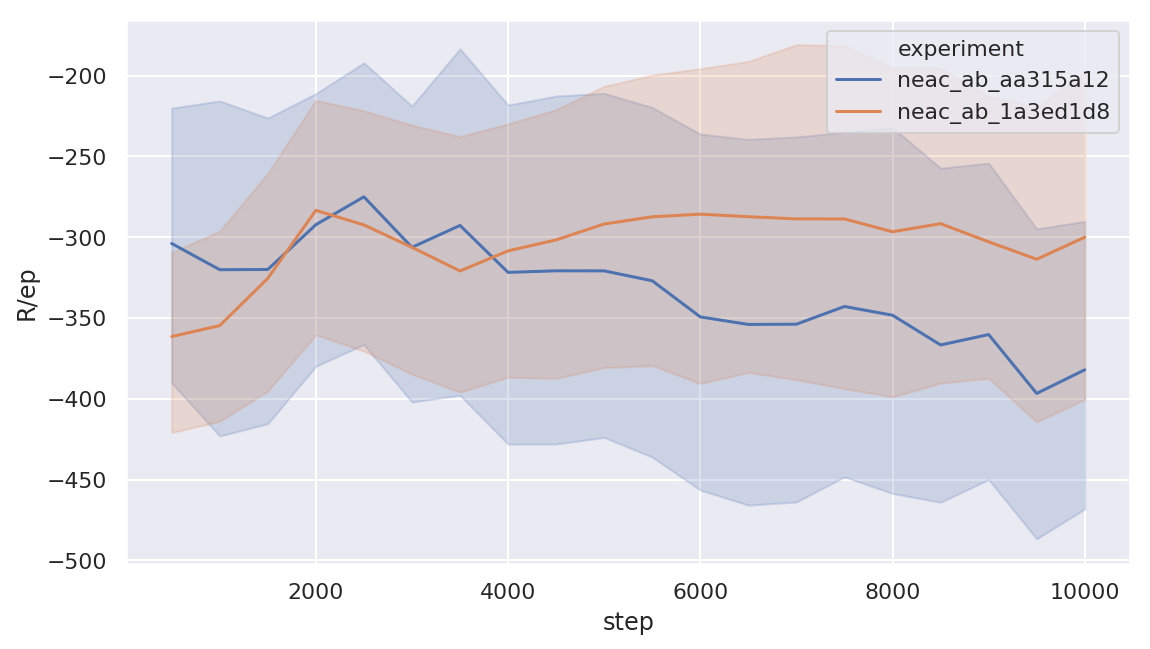

In [12]:
df_ab = data.loc[data["experiment"].str.contains('neac_ab')].copy()
plot(df_ab, x="step", hue="experiment", window=0)

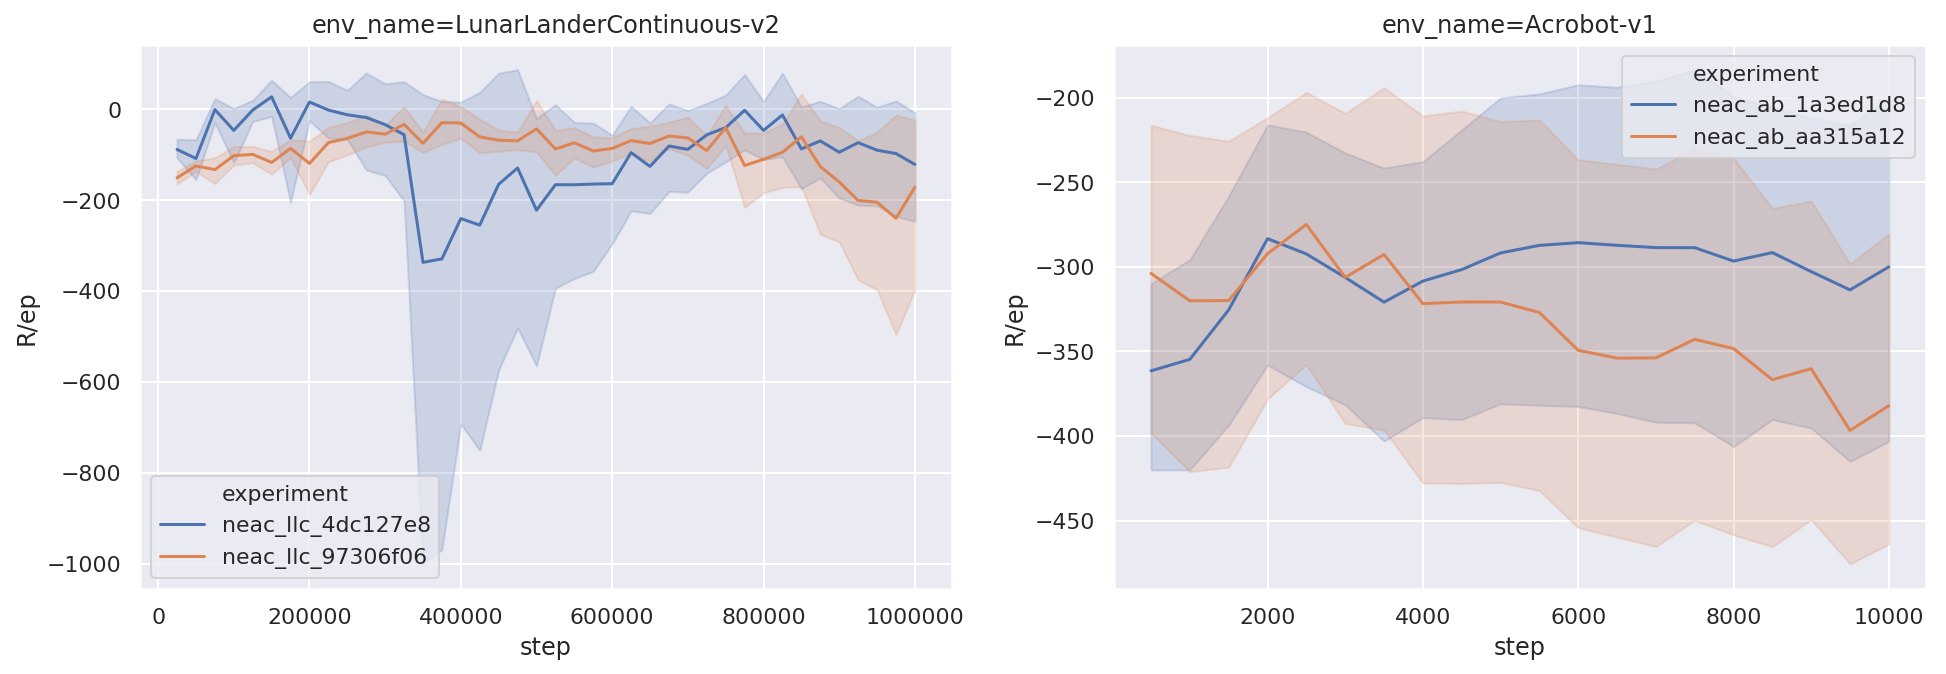

In [13]:
plot_grid(data.copy(), x="step", hue="experiment", cols="env_name", window=0)

## Lunar Lander Discrete

In [3]:
experiment_path = "../results/2019Dec04-133644_neac_confirm/"
hyperparams = ["nsteps", "gamma", "lr", "beta_entropy", "dnd.lr", "dnd.size", "dnd.key_size", "dnd.knn_no", "env_name"]
metrics = ["R/ep"]

trial_paths = get_file_paths(experiment_path, ignore_crashed=False)
neac_df = get_data(trial_paths, hyperparams, metrics, log="valid", cb=custom_experiment_name)

Processing 50 trials.


In [4]:
neac_df.experiment.unique()

array(['fine_neac_lld_7e96fd66', 'fine_neac_lld_8d293886',
       'fine_neac_lld_65cf84c2', 'neac_lld_00817be8', 'neac_lld_5b848fce'],
      dtype=object)

In [5]:
neac_df = neac_df.loc[~neac_df["experiment"].isin(['fine_neac_lld_65cf84c2', 'neac_lld_5b848fce'])].copy()

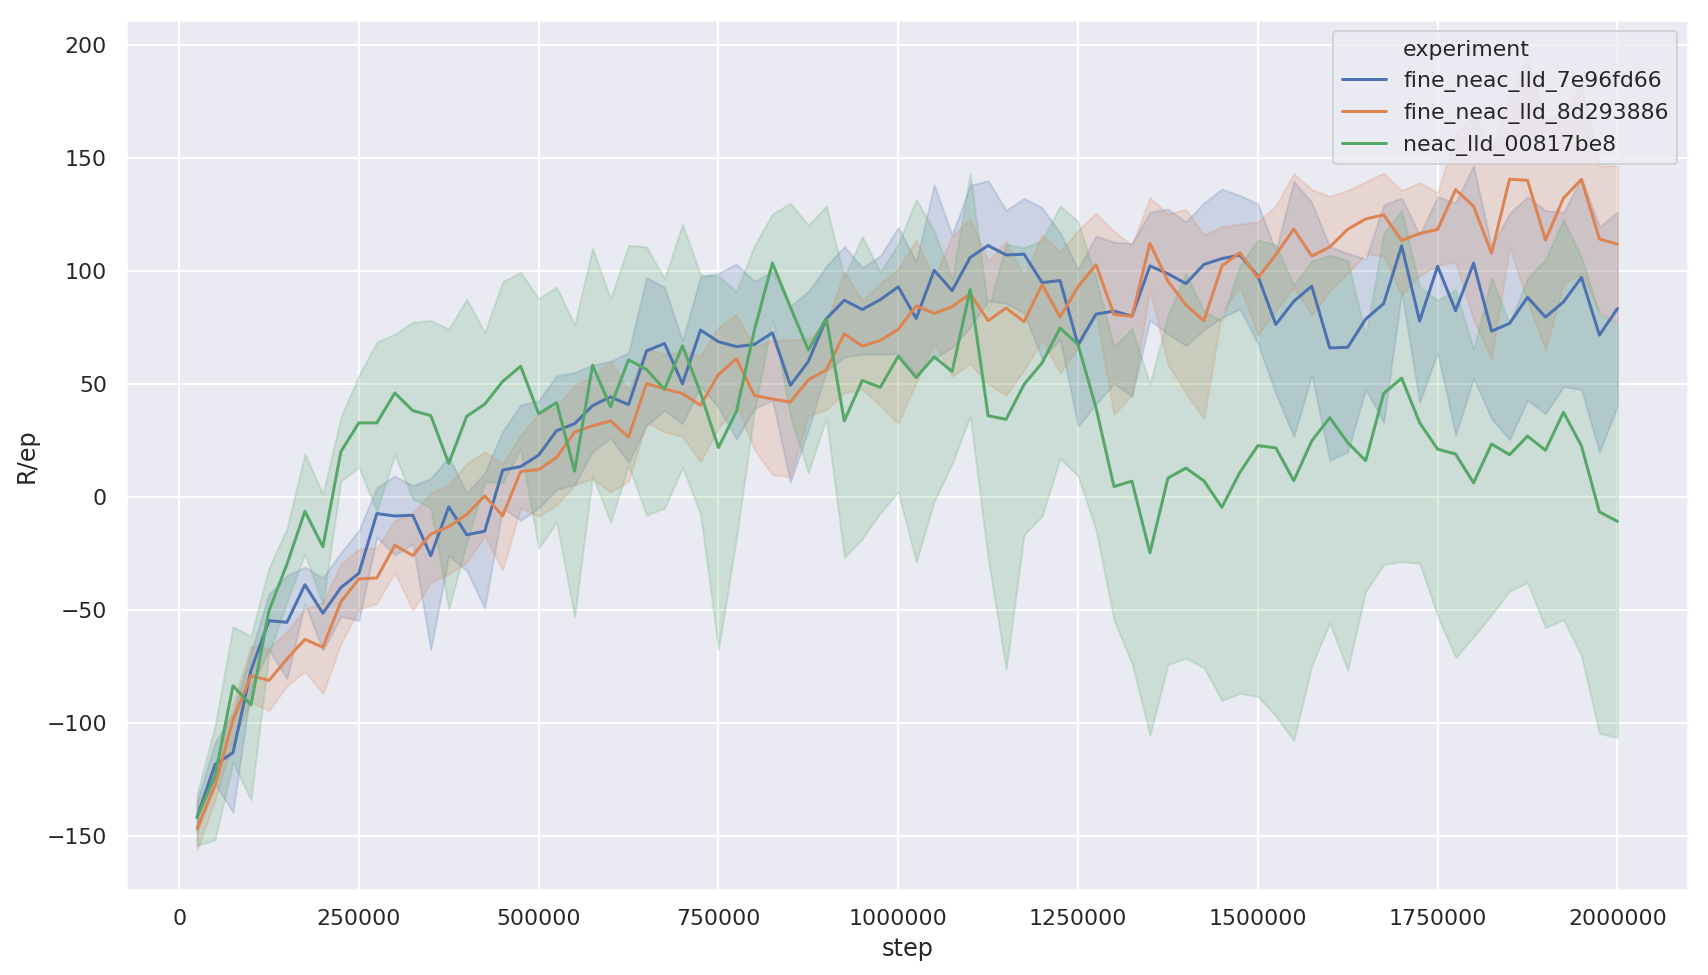

In [6]:
plot(neac_df, x="step", hue="experiment", window=0, width=14, height=8)

In [7]:
experiment_path = "../results/2019Dec05-123330_a2c_lld_confirm/"
hyperparams = ["nsteps", "gamma", "lr", "beta_entropy", "env_name"]
metrics = ["R/ep"]

trial_paths = get_file_paths(experiment_path, ignore_crashed=False)
a2c_df = get_data(trial_paths, hyperparams, metrics, log="valid", cb=custom_experiment_name)

Processing 40 trials.


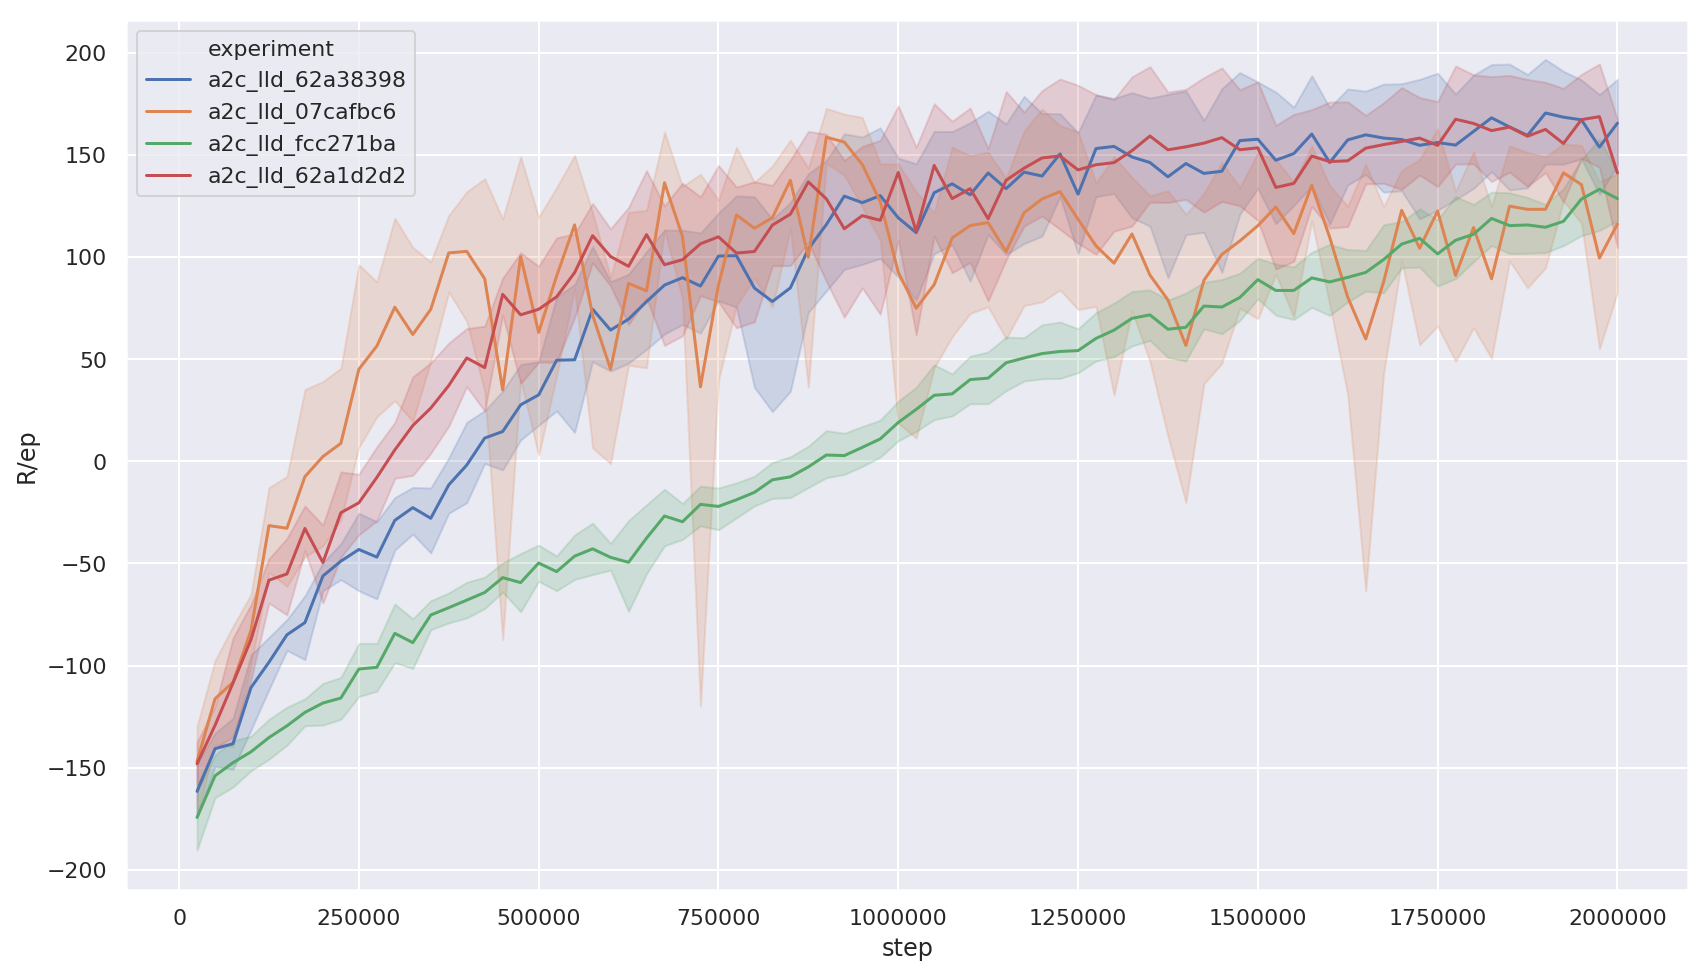

In [8]:
plot(a2c_df, x="step", hue="experiment", window=0, width=14, height=8)

## Comparison

In [17]:
compare = a2c_df.loc[a2c_df["experiment"] == "a2c_lld_62a1d2d2"]
compare = compare.append(neac_df.loc[neac_df["experiment"] == "fine_neac_lld_8d293886"], ignore_index=True)

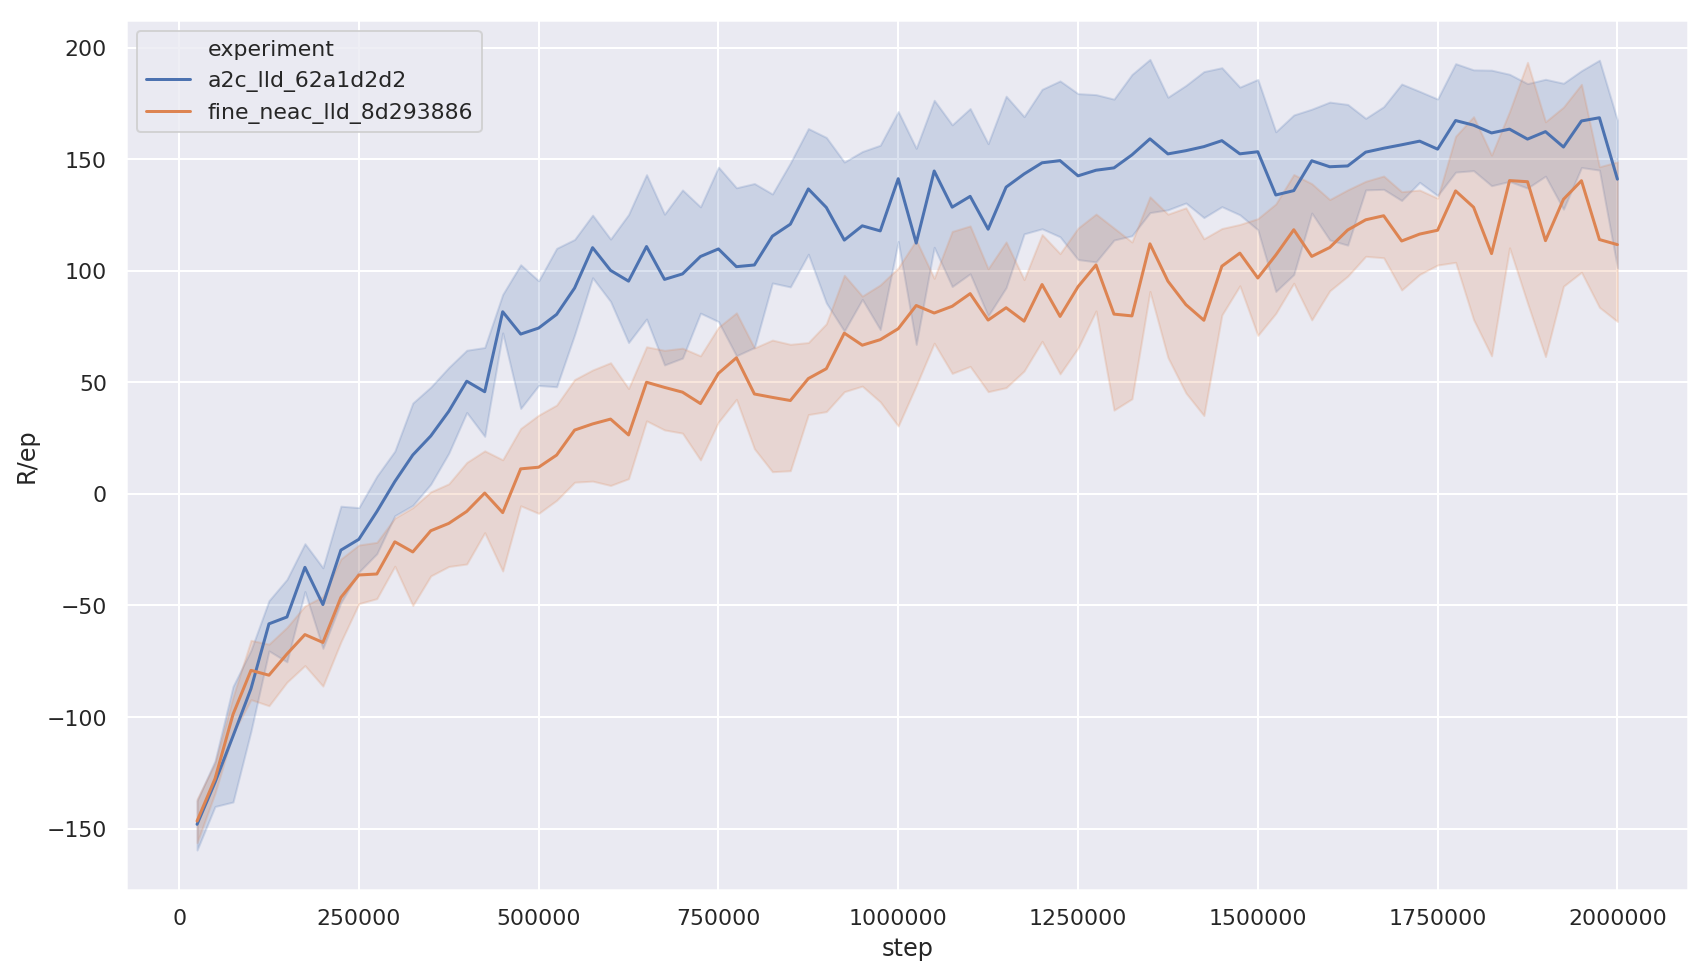

In [19]:
plot(compare, x="step", hue="experiment", window=0, width=14, height=8)